In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import holodeck as holo
import holodeck.single_sources as ss
from holodeck import utils, plot
from holodeck.constants import MSOL, PC, YR, MPC, GYR


### Build the default semi-analytic model.
* 60 mass bins between [1.0e4, 1.0e11] $M_\odot$
* 80 ratio bins between [1e-3, 1.0]
* 100 redshift bins between [1e-3, 10.0]
* 24 frequency bins between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
* hardening model: HARD_GW

In [2]:
edges, number, fobs, exname = ss.example5(print_test=True)
exname = str(number.shape)+' Grid Example'

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

### Calculate strains using the ss cython function

In [3]:
hc_bg, hc_ss, ssidx, hsamp = ss.ss_by_cdefs(edges, number, realize=50)

# Combination Plot

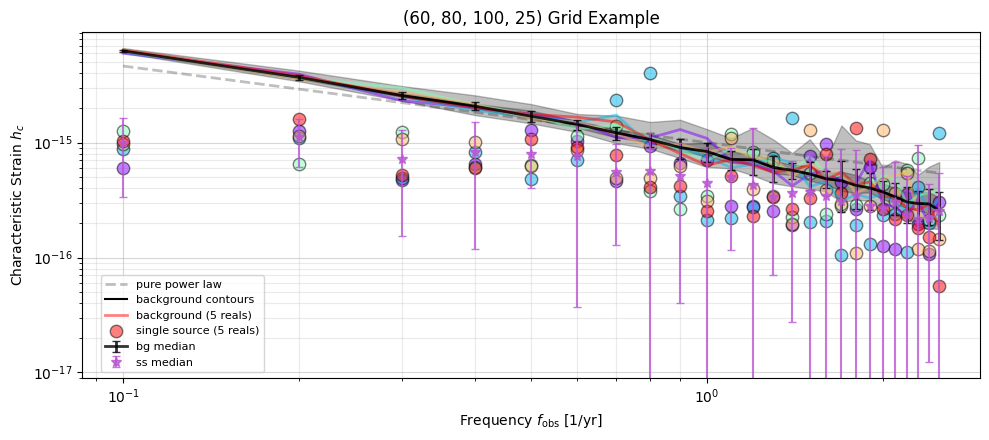

In [4]:
#optional:
INCLUDE_MEDIANS = True


fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])
ax.set_title(exname)
xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')


# plot the background contours 
ss.plot_BG(ax, xx, hc_bg, LABEL='background contours', COLOR='k',
           reals=0, median = True)

# plot the first 5 realizations
ss.plot_samples(ax, xx, SS = hc_ss, BG = hc_bg, reals=5, LABEL=' (5 reals)')


# plot medians and errorbars
ss.plot_medians(ax, xx, BG=hc_bg, SS=hc_ss, 
                BG_ERRORS=True, BG_COLOR='k',
                SS_ERRORS=True, SS_COLOR='mediumorchid')


legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), 
                       bbox_transform=fig.transFigure, loc='lower left',
                       fontsize=8)

# ax.set_ylim(1e-16, 3e-15)
fig.tight_layout()

# plot_medians()

In [5]:
import holodeck.single_sources as ss

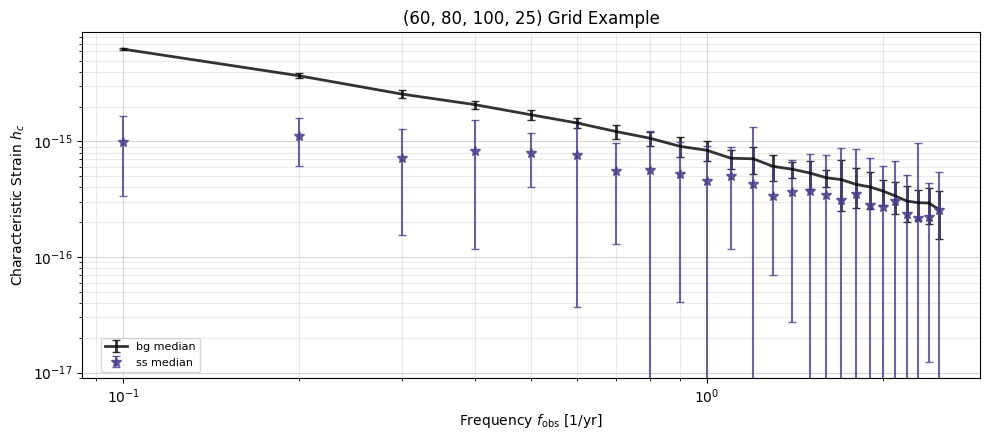

In [6]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])
ax.set_title(exname)
xx = fobs * YR

# plot medians without errorbars
# ss.plot_medians(ax, xx, BG=hc_bg, SS=hc_ss,SS_COLOR='b',
#                 BG_ERRORS=False, SS_ERRORS=False)

# plot medians with errorbars
ss.plot_medians(ax, xx, BG=hc_bg, SS=hc_ss, 
                BG_ERRORS=True, BG_COLOR='black',
                SS_ERRORS=True, SS_COLOR='darkslateblue')

legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), 
                       bbox_transform=fig.transFigure, loc='lower left',
                       fontsize=8)


# ax.set_ylim(1e-16, 3e-15)
fig.tight_layout()

# plot_BG()

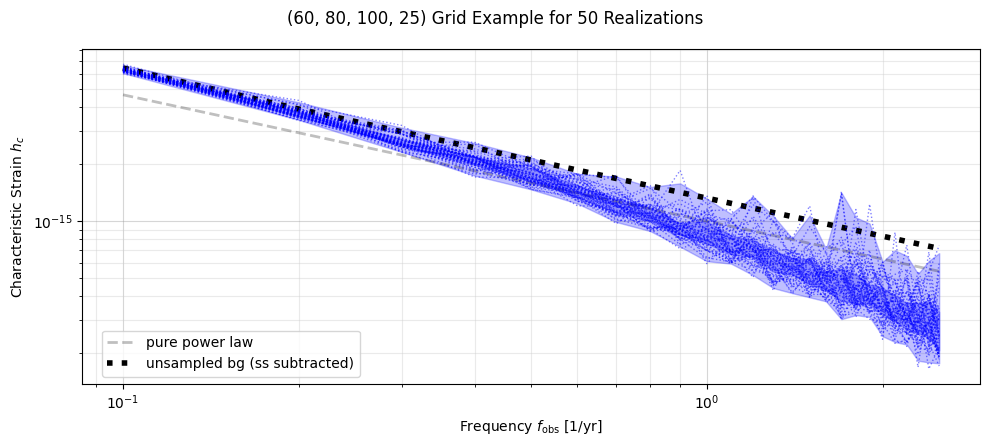

In [7]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])
fig.suptitle(exname+' for %d Realizations' % hc_bg[1].shape)
xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the model without sampling
hc_bg_exp = ss.ss_by_cdefs(edges, number, realize=False, round=False)[0]
ax.plot(xx, hc_bg_exp, color='k', lw=4, ls = 'dotted', label='unsampled bg (ss subtracted)')

# plot the model with Poisson sampling
# ss.plot_GWB(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations' % hc_bg.shape[1], COLOR='b')
ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], reals=hc_bg.shape[1], COLOR='b')


legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

# plot_samples()

In [8]:
import holodeck.single_sources as ss

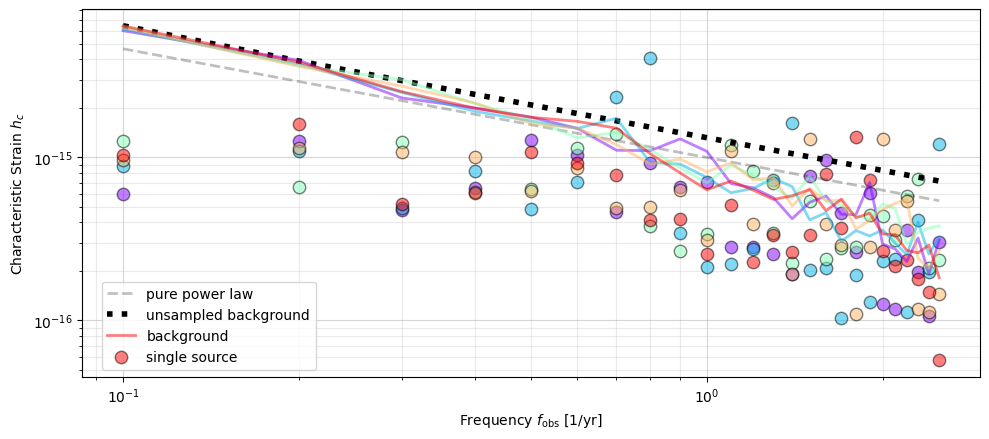

In [9]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])

xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the model without sampling
hc_bg_exp = ss.ss_by_cdefs(edges, number, realize=False, round=False)[0]
ax.plot(xx, hc_bg_exp, color='k', lw=4, ls = 'dotted', label='unsampled background')

# plot the model with Poisson sampling
# ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], reals=1, COLOR='b')
ss.plot_samples(ax, xx, hc_bg, hc_ss, reals=5)

legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

# plot_std() / plot_IQR()

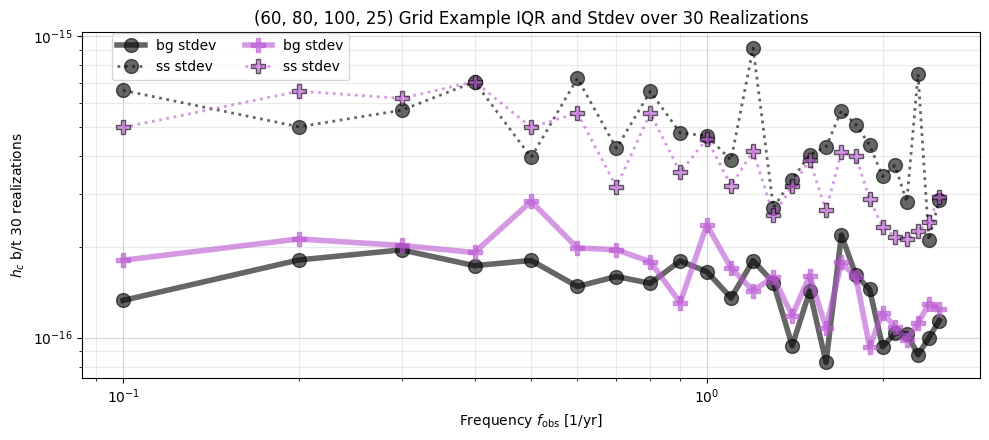

In [10]:
# IQR and Stdev 
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel=r'$h_c$ b/t 30 realizations', figsize=[10,4.5])
ax.set_title(exname+' IQR and Stdev over 30 Realizations')
xx = fobs * YR

ss.plot_std(ax, xx, hc_bg, hc_ss, COLOR='black')
ss.plot_IQR(ax, xx, hc_bg, hc_ss, COLOR='mediumorchid')

legend_gwb = ax.legend(bbox_to_anchor=(.11,.93), bbox_transform=fig.transFigure, 
        loc='upper left', ncol = 2)
fig.tight_layout()

# Percentiles

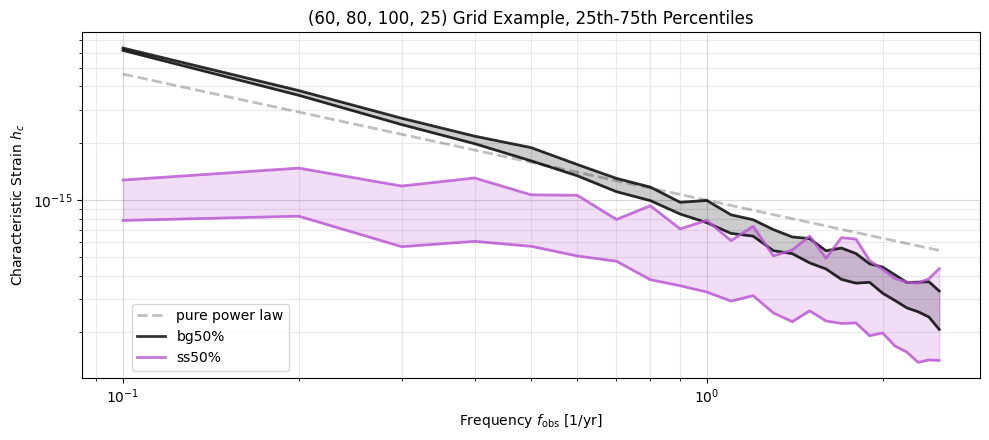

In [11]:
# Plot percentiles
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])
ax.set_title(exname+', 25th-75th Percentiles')
xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the 25th-75th percentiles of both
ss.plot_percentiles(ax, xx, BG=hc_bg, SS=hc_ss, LABEL='50%',
                    BG_COLOR='black', SS_COLOR='mediumorchid')


legend_gwb = ax.legend(bbox_to_anchor=(.13,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

# plot_params()

In [12]:
import holodeck.single_sources as ss

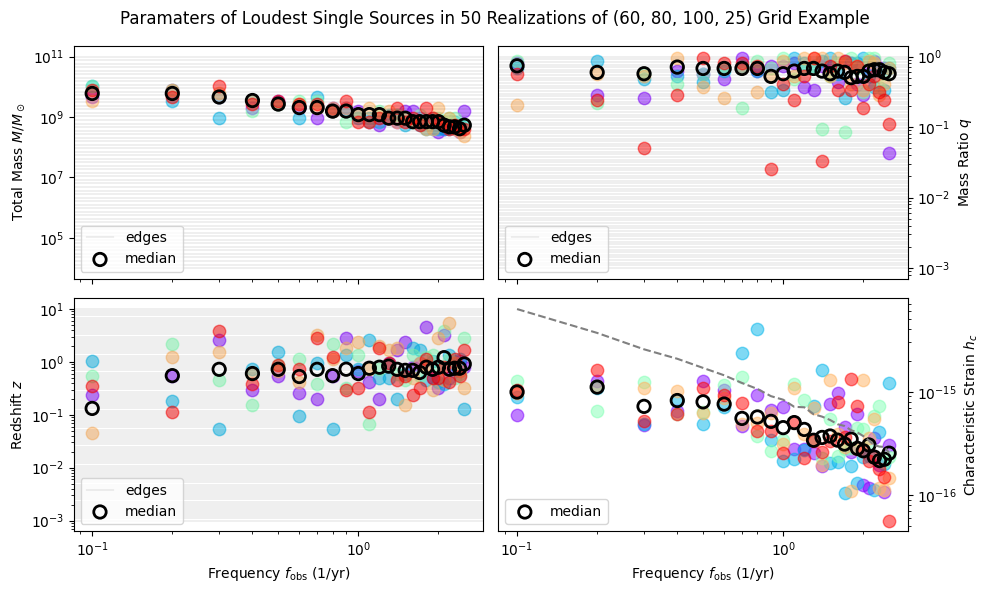

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Paramaters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx)
params = np.array([[marr/MSOL, qarr], [zarr, hc_ss]])

ss.plot_params(axs, xx, params, grid, reals=5)

 
#background strain
axs[1,1].plot(xx, np.median(hc_bg, axis=1), label = 'background',
            color='grey', linestyle='dashed')


fig.tight_layout()